# Classification

## K-Nearest Neighbours

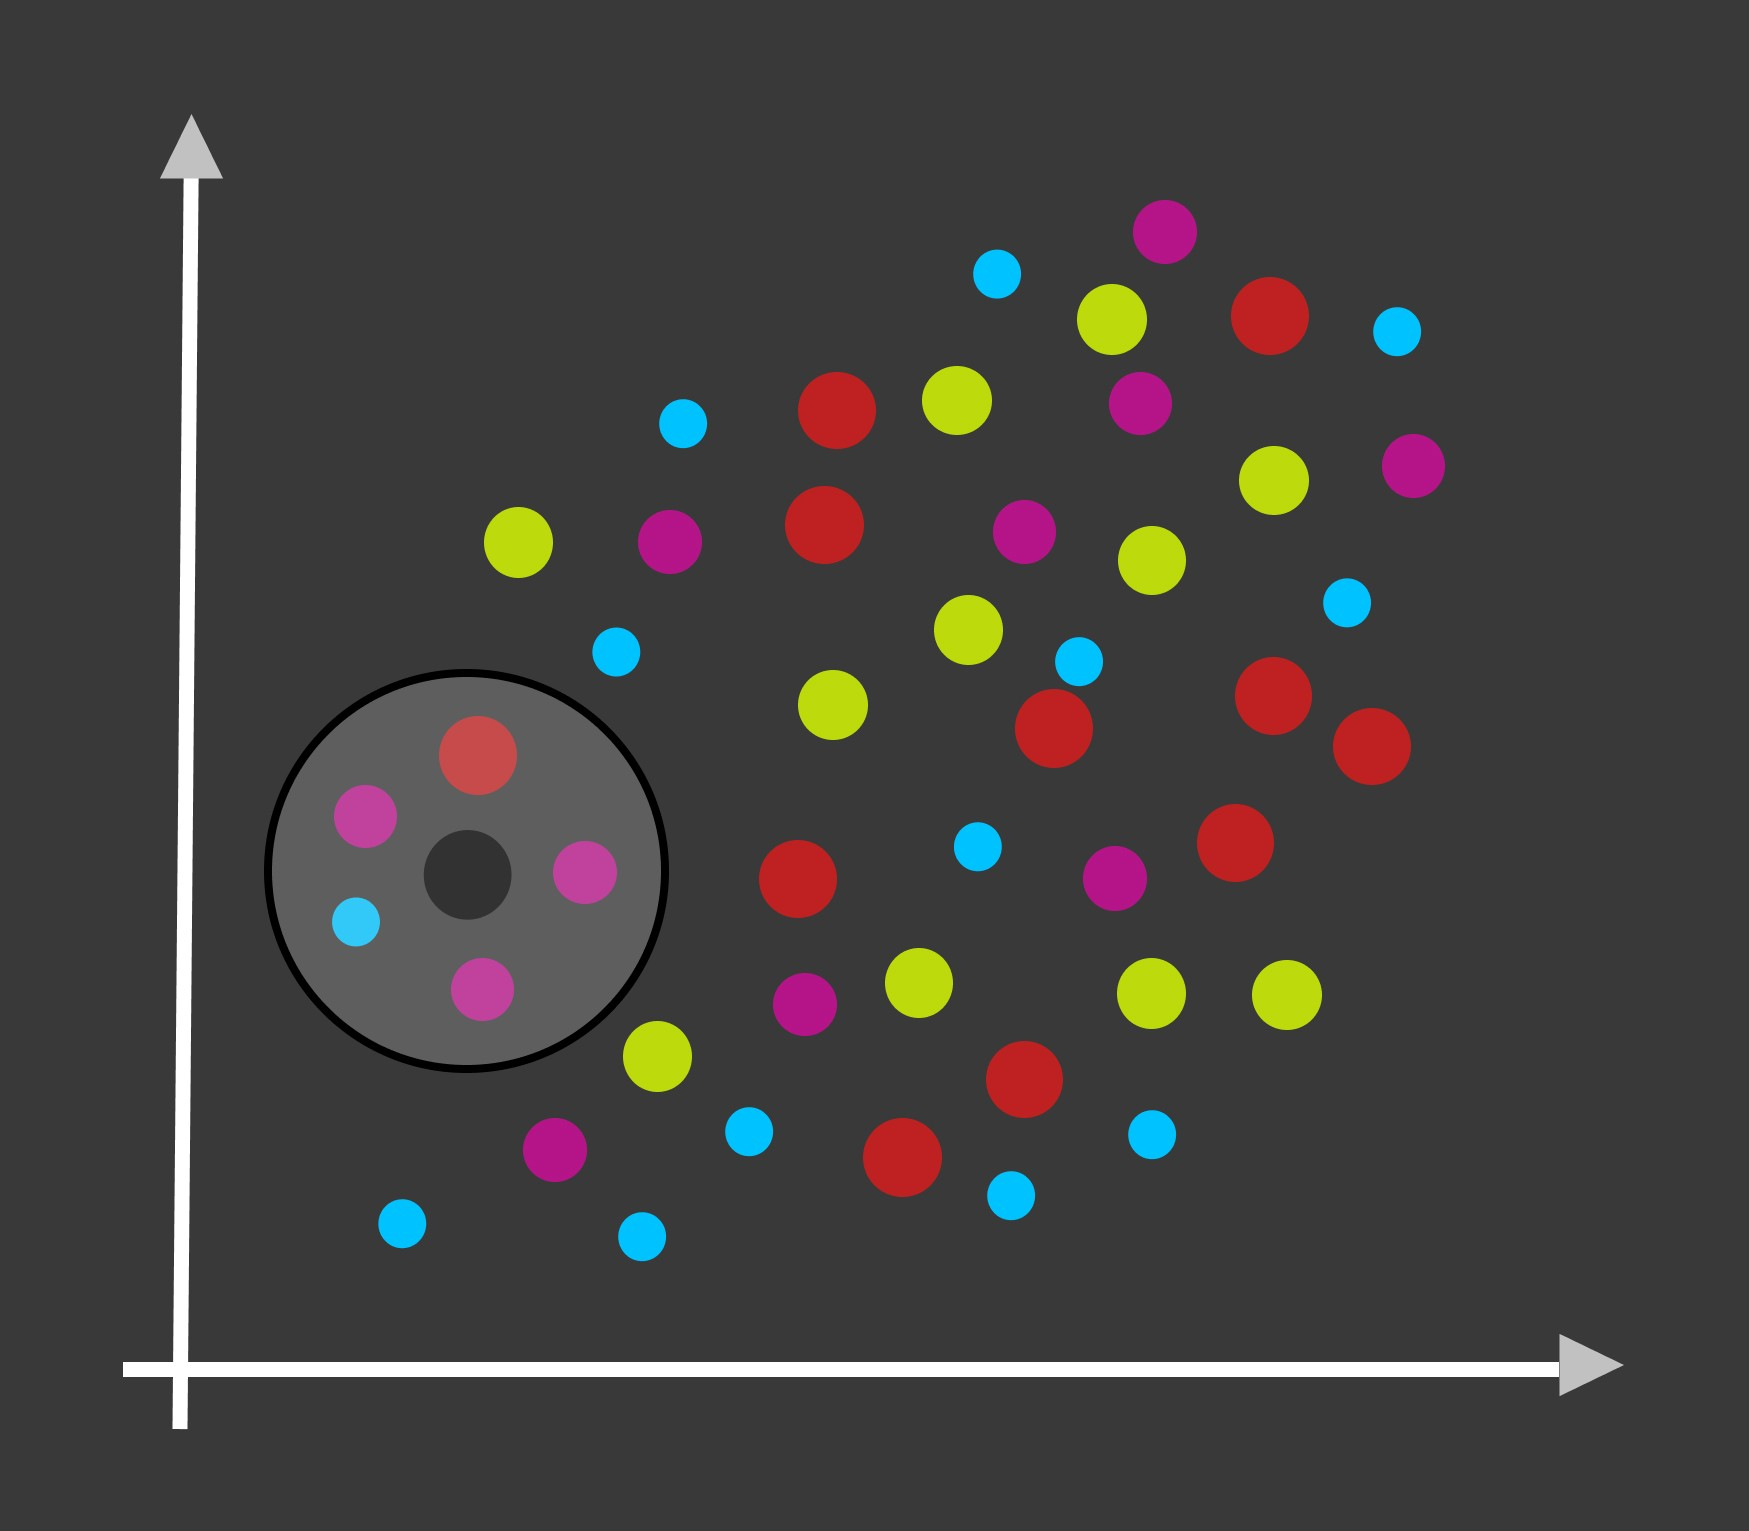

In [1]:
from IPython.display import Image
Image(filename='knn.jpeg', width= 500, height=500)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info() # we want to predict quality!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Pre-processing data
#### from pandas dataframe to np.array
To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array.
so first we have to preprocess the data to obtain the right format for sklearn models:

In [5]:
x = df.loc[:,"fixed acidity":"alcohol"]
y = df.loc[:, "quality"]
np_x = x.values
np_y = y.values
np_x[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
        0.9978,  3.51  ,  0.56  ,  9.4   ])

#### standardize the variables
In some cases is which are based on the euclidian distance is important to standardize our variable (mu =0, sigma=1). we can perform this operation with the preprocessing module inside sklearn:

In [6]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
standardize_x = stand.fit(np_x).transform(np_x)
standardize_x[0]

array([-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
       -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
       -0.96024611])

### Split training_test set

Now that we have preprocessed our df we have to split it into two set: the training and the test set. is possible to perform this operation by hand as we saw in the linear regression or we can let do this operation to sklearn using the module model_selection.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standardize_x, np_y, test_size=0.2)
print("shape of x_train, y_train:" ,x_train.shape, y_train.shape)
print("shape of x_test, y_test:" ,x_test.shape, y_test.shape)

shape of x_train, y_train: (1279, 11) (1279,)
shape of x_test, y_test: (320, 11) (320,)


### Create and fit the K-NN model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors= 10)
knn_1_fitted = knn_1.fit(x_train, y_train)
knn_1_fitted

KNeighborsClassifier(n_neighbors=10)

### Check the accuracy and the confusion matrix

In [9]:
knn_1_pred = knn_1_fitted.predict(x_test)
# to see the mean:
print(np.mean(knn_1_pred == y_test))
# which is the same as
from sklearn import metrics
print(metrics.accuracy_score(knn_1_pred,y_test))
# confusion matrix:
metrics.confusion_matrix(knn_1_pred, y_test)

0.5625
0.5625


array([[ 0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  7, 92, 53,  5,  0],
       [ 1,  4, 22, 76, 14,  2],
       [ 0,  0,  3, 26, 12,  1],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

### Perform over multiple K and compare
Trying different k neighbours and check the score, there is an implementation function:

In [10]:
for iel in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=iel).fit(x_train, y_train)
    predi = knn.predict(x_test)
    print("k = ", iel, "Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)), "Test set Accuracy: ", metrics.accuracy_score(y_test, predi))


k =  1 Train set Accuracy:  1.0 Test set Accuracy:  0.59375
k =  2 Train set Accuracy:  0.8272087568412823 Test set Accuracy:  0.565625
k =  3 Train set Accuracy:  0.7834245504300235 Test set Accuracy:  0.575
k =  4 Train set Accuracy:  0.7232212666145426 Test set Accuracy:  0.58125
k =  5 Train set Accuracy:  0.7068021892103206 Test set Accuracy:  0.565625
k =  6 Train set Accuracy:  0.6810007818608288 Test set Accuracy:  0.575
k =  7 Train set Accuracy:  0.6763096168881939 Test set Accuracy:  0.578125
k =  8 Train set Accuracy:  0.6645817044566067 Test set Accuracy:  0.571875
k =  9 Train set Accuracy:  0.6559812353401094 Test set Accuracy:  0.553125


## Decision Trees

wich attribute is the best to split our dataframe? the more suitable is the one which divide best.. the entropy is the randomness or uncertainty of a specific nodes, if are perfectly splitted the entropy = 0 while half are A and half B the entropy = 1. we basically choice the attributes to split looking in which the resulting node will have lower entropy! the information gain is the entropy of tree before the tree minus the entropy after the splitting:


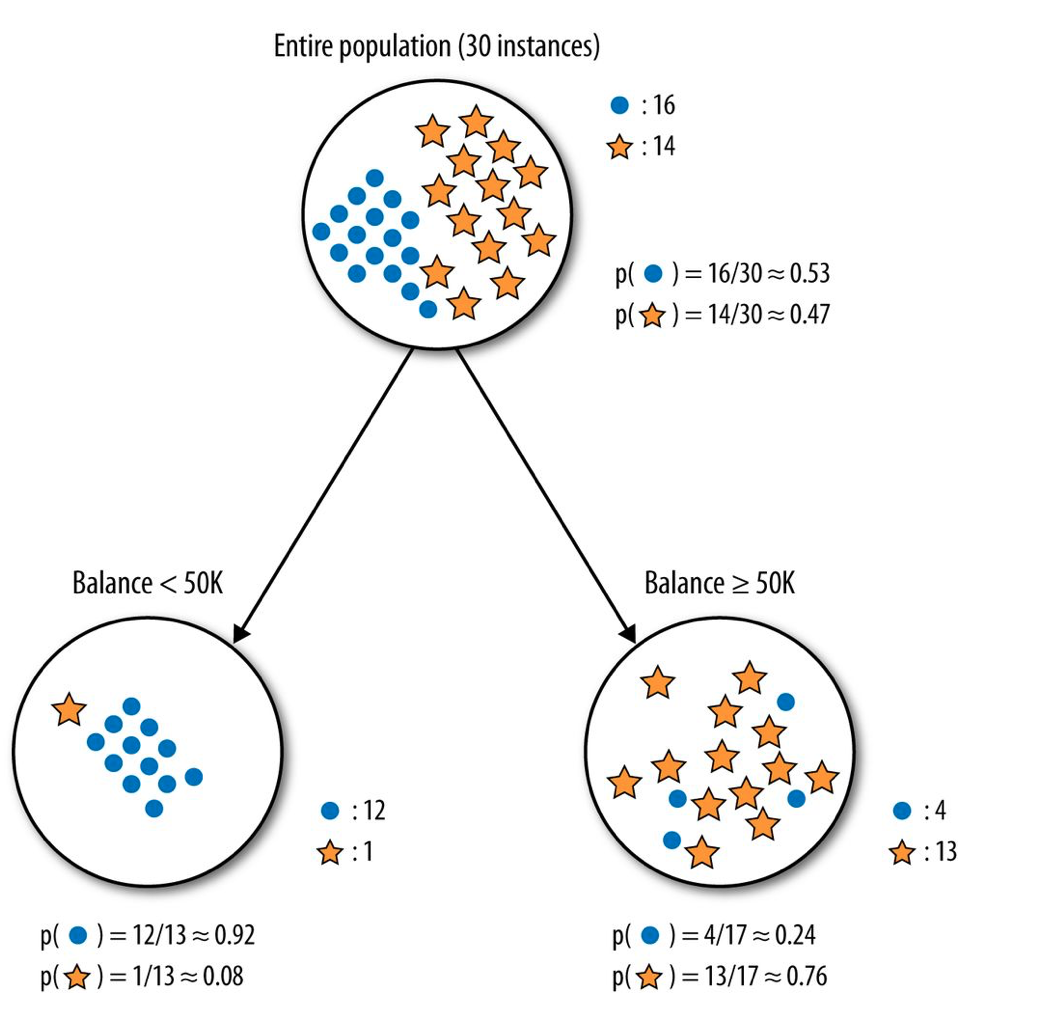

In [11]:
from IPython.display import Image
Image(filename='tree.png', width= 500, height=500)

In [12]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


i've created a categorical variable to perform a the label encoding later

In [13]:
df["level_chloride"] = df["chlorides"]>0.075
df["level_chloride"] = df["level_chloride"].map({True:"High", False:"Low"})
df["level_chloride"].value_counts()

High    983
Low     616
Name: level_chloride, dtype: int64

In [14]:
df["quality"] = df["quality"].astype(str)

### Pre-processing data

In [15]:
np_x = df[['alcohol', 'fixed acidity', 'volatile acidity',"level_chloride"]].values
np_y = df["quality"].values
np_x[0]

array([9.4, 7.4, 0.7, 'High'], dtype=object)

### LabelEncoder
We basically transofrm each string into a factor!

In [16]:
from sklearn import preprocessing
factor_levelclo = preprocessing.LabelEncoder() # create the encoder
factor_level_fitted = factor_levelclo.fit(np_x[:, 3]) # fit the encoder
factorized_level = factor_level_fitted.transform(np_x[:,3]) # transform into new variable
factorized_level

array([0, 0, 0, ..., 0, 1, 1])

In [17]:
np_x[:,3] = factorized_level # replaced the old one

### trasforming all into int

In [18]:
np_x = np_x.astype(int) # Now we have all numerical variable, typed as INT!

### create train/test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np_x,np_y, test_size=0.3)

### create the DecisionTree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
Tree = DecisionTreeClassifier(criterion ="entropy") # or gini
Tree_fitted = Tree.fit(x_train, y_train)
tree_pred = Tree_fitted.predict(x_test)

In [21]:
import sklearn.metrics
print(metrics.accuracy_score(y_test, tree_pred))

0.54375


### Plotting a smaller tree

[Text(200.88000000000002, 181.2, 'X[1] <= 9.0\nentropy = 1.157\nsamples = 100.0%\nvalue = [0.7, 0.1, 0.2]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 9.5\nentropy = 0.764\nsamples = 90.0%\nvalue = [0.778, 0.0, 0.222]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.592\nsamples = 70.0%\nvalue = [0.857, 0.0, 0.143]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 1.0\nsamples = 20.0%\nvalue = [0.5, 0.0, 0.5]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 10.0%\nvalue = [0.0, 1.0, 0.0]')]

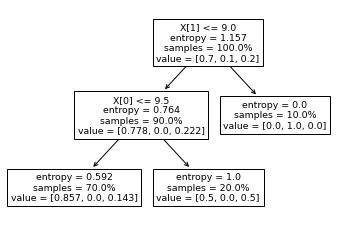

In [22]:
small_x = np_x[0:10,0:2]
small_y = np_y[0:10]
tree2 = DecisionTreeClassifier(criterion="entropy").fit(small_x,small_y)
plot_tree(tree2, proportion=True)

## Logistic Regression

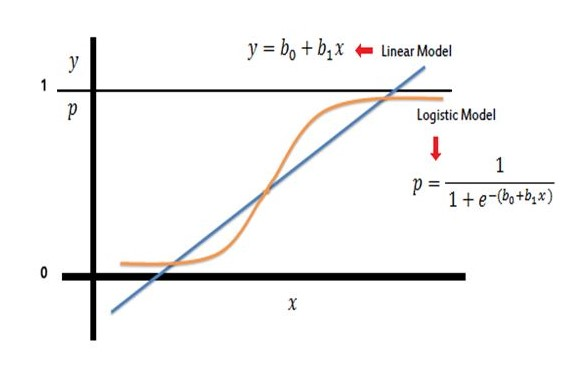

In [23]:
from IPython.display import Image
Image(filename='logit.jpg', width= 600, height=600)

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


let's create a binary column from our dataframe that we will try to predict:

In [25]:
df["quality"].unique()
df["binary_quality"] = df["quality"]>5
df["binary_quality"] = df["binary_quality"].map({False:0, True:1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Pre-processing data

#### from pandas to np.array

In [26]:
np_x = df[["fixed acidity","volatile acidity","alcohol"]].values
np_y = df["binary_quality"].astype(int) # must be type int !!

### Split training_test set

In [27]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(np_x, np_y, test_size=0.4)

### Create and perfome a LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
reg1 = LogisticRegression()
reg1_fitted = reg1.fit(train_x, train_y)

### check the accuracy and confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred = reg1_fitted.predict(test_x)
print(confusion_matrix(pred, test_y))
accuracy_score(pred, test_y)

[[225  96]
 [ 76 243]]


0.73125

# Support Vector Machine SVM

SVM is a supervised algorith that classifies cases by finding a separator, basically it maps the data to a high-dimensional feature space where it is possible to find it (as hyperplane). the separator which does not exist in the space of the data will appear into the higher dimension!

How we can find the best hiperplane and how we can trasform the data? if we image that our data is one dimension (one line) we can transform it into a two-dimensional data as:





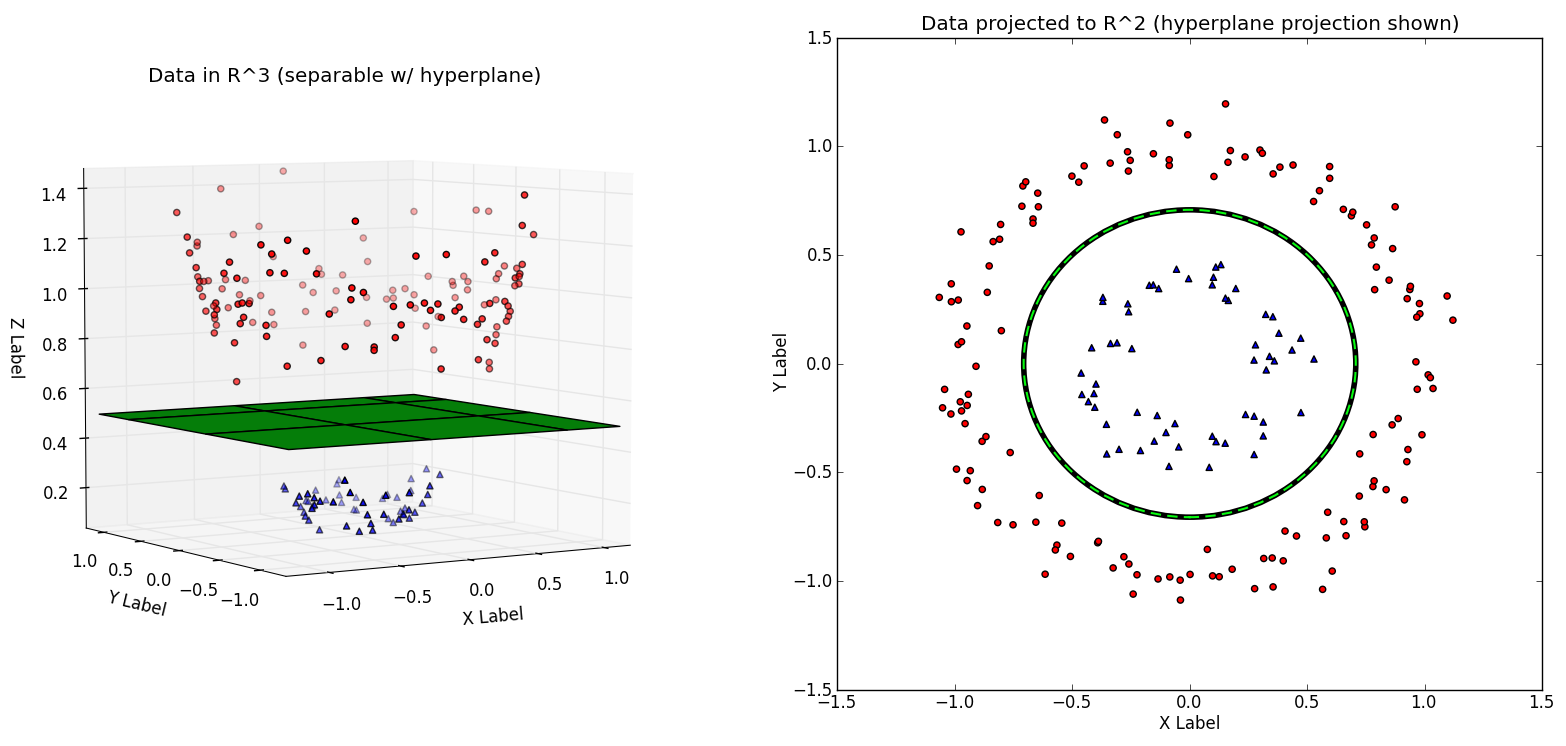

In [30]:
from IPython.display import Image
Image(filename='svm.png', width= 1000, height=1000)

the function that do this is called kernel function. they are already implemented into packages! we usually compare different of them and compare the result.

How do we find the best hyperplane? the goal is to choice the one with the biggest margin, the points near the thresold are support vector, we have to find the best hyperplain wichi minimize the equation of the support vector (the point near the boundary surfare). *Riggi lesson

SVM are accurate in high dimensional spaces and they are memory efficient, but svm is prone to over-fitting and is impossible to probability estimation (last it work bad with small dataset).

it is used for image recognition and text category assignment (detecting spam, sentiment analysis and so on).

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv("nei.csv")
df.head(2)

,Unnamed: 0,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2


In [32]:
df.info() # there is a column which as the wrong type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   699 non-null    int64 
 1   ID           699 non-null    int64 
 2   Clump        699 non-null    int64 
 3   UnifSize     699 non-null    int64 
 4   UnifShape    699 non-null    int64 
 5   MargAdh      699 non-null    int64 
 6   SingEpiSize  699 non-null    int64 
 7   BareNuc      699 non-null    object
 8   BlandChrom   699 non-null    int64 
 9   NormNucl     699 non-null    int64 
 10  Mit          699 non-null    int64 
 11  Class        699 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 65.7+ KB


In [33]:
df = df.loc[df["BareNuc"].str.isdigit()] # there are some "?" over the dataframe
df["BareNuc"] = df["BareNuc"].apply(int)

In [34]:
# transofrm the dataframe into a numpy array:
df_x = df.loc[:, "Clump" : 'Mit']
df_y = df["Class"]
df_x = np.asarray(df_x.values)
df_y = np.asarray(df_y.values)
df_y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [35]:
# splitting the df into test / training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y, test_size=0.3)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
- Linear
- Polynomial
- Radial basis function (RBF)
- Sigmoid

In [36]:
# prepare the model
from sklearn import svm
svm1 = svm.SVC ( kernel = "rbf") # kernel = "linear","polynomial","rbf" ...
svm1.fit(train_x,train_y)

SVC()

In [37]:
# predict test set
prediction_test =svm1.predict(test_x)
# looking at the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(prediction_test, test_y))
accuracy_score(prediction_test,test_y)

[[129   3]
 [  6  67]]


0.9560975609756097